In [ ]:

import numpy as np 
import pandas as pd 


import os


/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
data=pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print(data.isnull().sum())  # Check for any missing values

# Encode the 'label' column (crops)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Define features and target
X = data.drop('label', axis=1)  # Features (N, P, K, etc.)
y = data['label']  # Target (encoded labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy:  0.9636363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00    

In [6]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

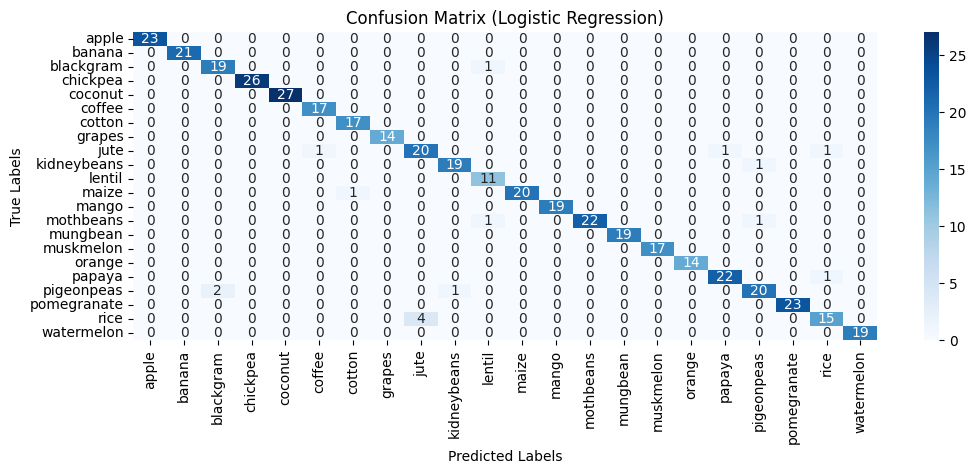

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(12, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

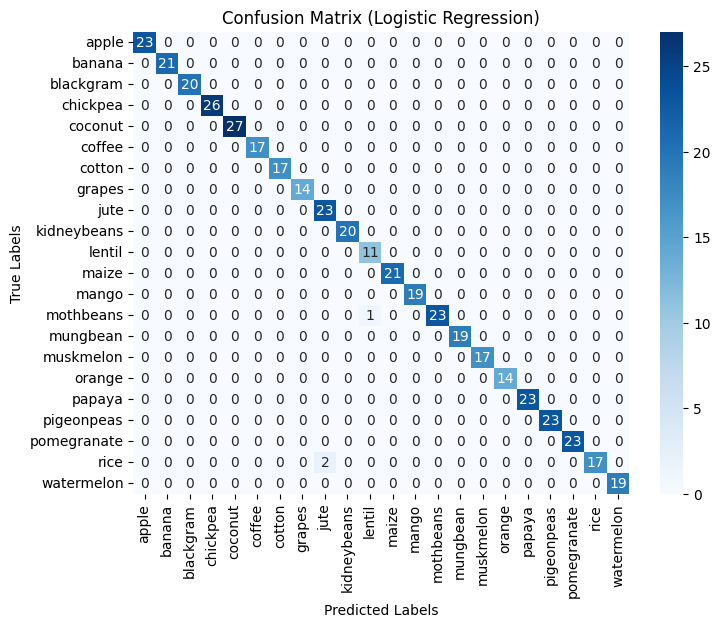

In [8]:
# Confusion Matrix for Logistic Regression
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

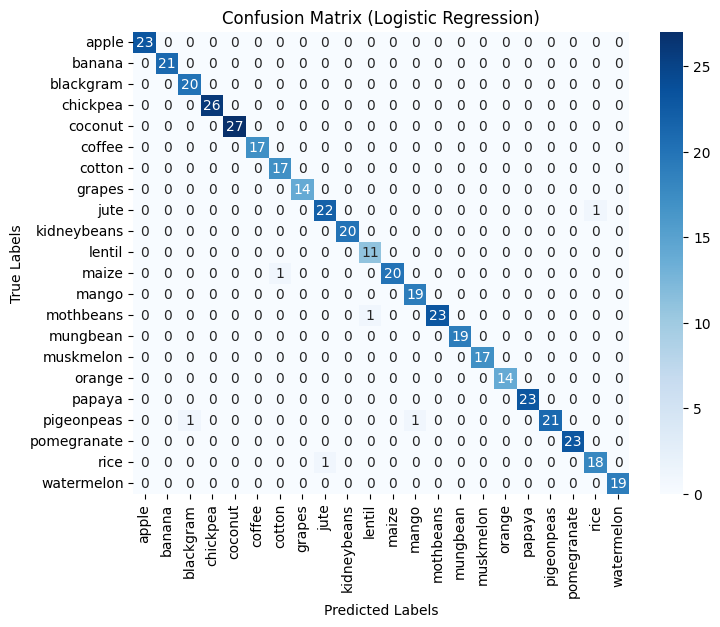

In [9]:
# Confusion Matrix for Logistic Regression
cm_gb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
# Predict using Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)

# Convert numerical predictions back to crop names using the label encoder
predicted_crops_logreg = label_encoder.inverse_transform(y_pred_logreg)

# Convert actual labels back to crop names
actual_crops = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predicted vs actual
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual Crop': actual_crops,
    'Predicted Crop': predicted_crops_logreg
})

# Display the first 10 rows of actual vs predicted crops
print(comparison_df.head(10))

  Actual Crop Predicted Crop
0   muskmelon      muskmelon
1  watermelon     watermelon
2      papaya         papaya
3      papaya         papaya
4       apple          apple
5       mango          mango
6       apple          apple
7   mothbeans      mothbeans
8    mungbean       mungbean
9      lentil         lentil


In [11]:
# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Convert numerical predictions back to crop names using the label encoder
predicted_crops_xgb = label_encoder.inverse_transform(y_pred_xgb)

# Convert actual labels back to crop names
actual_crops = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predicted vs actual for XGBoost
comparison_df_xgb = pd.DataFrame({
    'Actual Crop': actual_crops,
    'Predicted Crop': predicted_crops_xgb
})

# Display the first 10 rows of actual vs predicted crops
print("XGBoost - Actual vs Predicted Crops:")
print(comparison_df_xgb.head(10))


XGBoost - Actual vs Predicted Crops:
  Actual Crop Predicted Crop
0   muskmelon      muskmelon
1  watermelon     watermelon
2      papaya         papaya
3      papaya         papaya
4       apple          apple
5       mango          mango
6       apple          apple
7   mothbeans      mothbeans
8    mungbean       mungbean
9      lentil         lentil


In [12]:
# Predict using Random Forest
y_pred_rf = rf.predict(X_test)

# Convert numerical predictions back to crop names using the label encoder
predicted_crops_rf = label_encoder.inverse_transform(y_pred_rf)

# Convert actual labels back to crop names
actual_crops = label_encoder.inverse_transform(y_test)

# Create a DataFrame to display predicted vs actual for Random Forest
comparison_df_rf = pd.DataFrame({
    'Actual Crop': actual_crops,
    'Predicted Crop': predicted_crops_rf
})

# Display the first 10 rows of actual vs predicted crops
print("Random Forest - Actual vs Predicted Crops:")
print(comparison_df_rf.head(10))


Random Forest - Actual vs Predicted Crops:
  Actual Crop Predicted Crop
0   muskmelon      muskmelon
1  watermelon     watermelon
2      papaya         papaya
3      papaya         papaya
4       apple          apple
5       mango          mango
6       apple          apple
7   mothbeans      mothbeans
8    mungbean       mungbean
9      lentil         lentil
